# Fashion-Mnist 

#### Imports

In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from tensorflow.keras.datasets import fashion_mnist
import warnings                                     
warnings.filterwarnings("ignore")
import random
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier

#### Loading the dataset

In [56]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [57]:
X_train.shape

(60000, 28, 28)

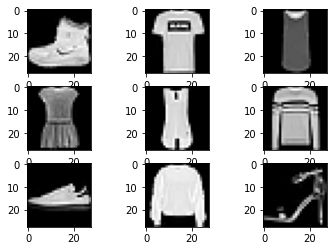

In [58]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

#### Replace to dataframe object 

In [59]:
X_train_copy=X_train.copy()
X_train_copy=X_train_copy.reshape(60000,784,)
y_train_copy=y_train.copy()
y_train_copy=y_train_copy.reshape(60000,)


In [60]:
images=pd.DataFrame(X_train_copy)
labels=pd.DataFrame(y_train_copy)
labels.columns=['Labels']
fashion=pd.concat([images,labels],axis=1)
fashion

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,3
59998,0,0,0,0,0,0,0,0,0,0,...,54,50,5,0,1,0,0,0,0,0


#### Change columns names for better visualization

In [61]:
columnsNames=[]
for i in range (1,785):
    label='pixel'+str(i)
    columnsNames.append(label)
columnsNames.append('Labels')
fashion.columns = columnsNames
fashion.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'Labels'],
      dtype='object', length=785)

In [62]:
fashion.Labels.replace([0,1,2,3,4,5,6,7,8,9],['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot'], inplace=True)

In [81]:
fashion

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ankle_boot
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,T-shirt
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,T-shirt
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,Dress
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T-shirt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sandal
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Trouser
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,Dress
59998,0,0,0,0,0,0,0,0,0,0,...,54,50,5,0,1,0,0,0,0,T-shirt


#### Our data is balanced 

In [72]:
fashion.Labels.value_counts()

Shirt         6000
Sandal        6000
Trouser       6000
Dress         6000
Pullover      6000
Ankle_boot    6000
T-shirt       6000
Bag           6000
Sneaker       6000
Coat          6000
Name: Labels, dtype: int64

In [64]:
fashion.groupby("Labels").sum()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
Labels,,,,,,,,,,,,,,,,,,,,,
Ankle_boot,0.0,44.0,44.0,44.0,61.0,62.0,65.0,66.0,77.0,184.0,...,2987.0,6170.0,14214.0,27728.0,44452.0,49743.0,43210.0,32100.0,14870.0,1131.0
Bag,4.0,62.0,139.0,1557.0,3381.0,5185.0,6647.0,8565.0,9149.0,10460.0,...,216105.0,206692.0,192685.0,168038.0,129942.0,82640.0,45453.0,24910.0,10371.0,1364.0
Coat,0.0,0.0,34.0,134.0,719.0,905.0,1494.0,3235.0,7854.0,25474.0,...,168205.0,105185.0,69136.0,256277.0,422848.0,328957.0,128307.0,20265.0,3147.0,185.0
Dress,16.0,16.0,22.0,50.0,798.0,1982.0,5126.0,11890.0,31402.0,132132.0,...,402563.0,213787.0,83033.0,23974.0,7446.0,2655.0,590.0,238.0,48.0,68.0
Pullover,1.0,40.0,257.0,607.0,1644.0,2830.0,6444.0,22332.0,69141.0,173899.0,...,113989.0,100593.0,99459.0,269045.0,498889.0,419949.0,189093.0,44141.0,6961.0,579.0
Sandal,0.0,13.0,13.0,21.0,37.0,36.0,41.0,48.0,178.0,293.0,...,2729.0,3031.0,4731.0,10623.0,16933.0,18349.0,22057.0,23026.0,9594.0,455.0
Shirt,19.0,52.0,406.0,1683.0,4475.0,7171.0,12660.0,35550.0,80936.0,131673.0,...,242856.0,163333.0,114576.0,136874.0,203247.0,155753.0,73809.0,15083.0,3278.0,375.0
Sneaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,69.0,77.0,77.0,104.0,107.0,120.0,156.0,173.0,1.0
T-shirt,8.0,117.0,886.0,2045.0,2728.0,4162.0,9512.0,33361.0,92811.0,198879.0,...,542512.0,480485.0,378322.0,160906.0,41074.0,11780.0,4822.0,1828.0,436.0,91.0


In [73]:
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

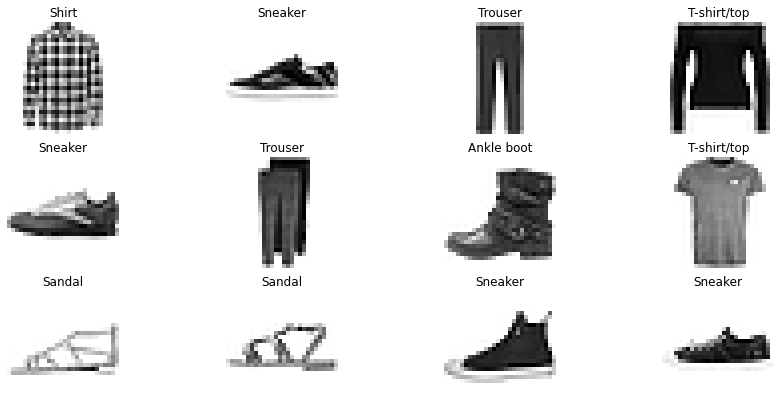

In [74]:

plt.figure(figsize=(15,7))
for i in range(12):
    ax=plt.subplot(3,4,i+1)
    rand_index=random.choice(range(len(X_train)))
    plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(label_names[y_train[rand_index]])

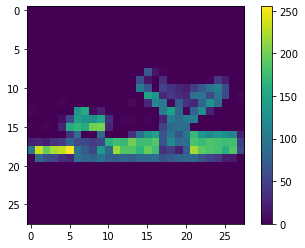

In [84]:
plt.figure()
plt.imshow(X_train[59999])
plt.colorbar()
plt.grid(False)
plt.show()

#### Scale the data

In [89]:
X_train = X_train/255.0
X_test = X_test/255.0

#### Models

#### Dummy model

In [90]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.1